In [0]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [0]:
iris_data = pd.read_csv('/content/drive/My Drive/GRANAT/Plant Classification/Iris Data.csv')

In [0]:
dataset = iris_data.drop('Id', axis=1)
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [0]:
Le = LabelEncoder()
dataset['Species'] = Le.fit_transform(dataset['Species'])
dataset['Species'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
dataset.corr(method='pearson')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


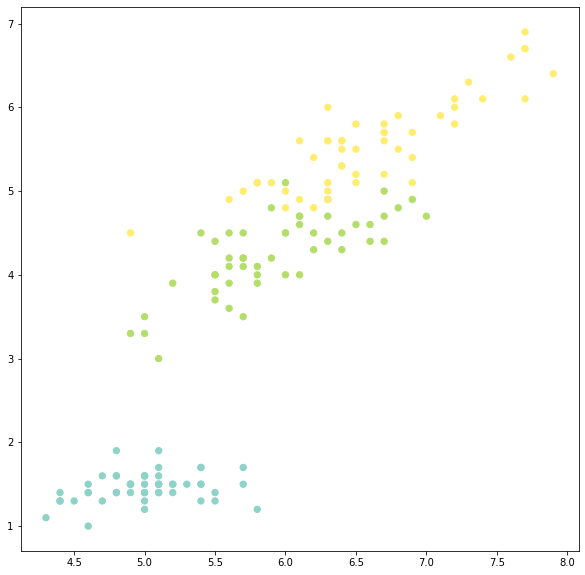

In [0]:
plt.figure(figsize=(10,10))
plt.scatter('SepalLengthCm', 'PetalLengthCm', data=dataset, s=40, cmap='Set3', c='Species')
plt.show()

In [0]:
X = dataset.drop('Species', axis=1)
Y = dataset['Species']

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.25, stratify=Y.values)

In [0]:
km = KMeans(n_clusters=3)
dt = DecisionTreeClassifier()

In [0]:
km_fit = km.fit(X_train)
predic_km = km_fit.predict(X_test)

In [0]:
accuracy_score(Y_test, predic_km)

0.868421052631579

In [0]:
predic_km

array([2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2,
       0, 2, 1, 0, 1, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2], dtype=int32)

In [0]:
Y_test

array([1, 2, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2,
       0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2])

In [0]:
dt_fit = dt.fit(X_train, Y_train)
predic_dt = dt_fit.predict(X_test)
accuracy_score(Y_test, predic_dt)

0.9210526315789473

[Text(313.875, 733.86, 'X[2] <= 2.45\ngini = 0.667\nsamples = 112\nvalue = [37, 38, 37]\nclass = Iris-versicolor'),
 Text(209.25, 570.78, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = Iris-Setosa'),
 Text(418.5, 570.78, 'X[3] <= 1.55\ngini = 0.5\nsamples = 75\nvalue = [0, 38, 37]\nclass = Iris-versicolor'),
 Text(209.25, 407.70000000000005, 'X[2] <= 5.0\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = Iris-versicolor'),
 Text(104.625, 244.62, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = Iris-versicolor'),
 Text(313.875, 244.62, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(627.75, 407.70000000000005, 'X[2] <= 4.85\ngini = 0.1\nsamples = 38\nvalue = [0, 2, 36]\nclass = Iris-virginica'),
 Text(523.125, 244.62, 'X[1] <= 3.1\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = Iris-virginica'),
 Text(418.5, 81.54000000000008, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(627.75, 81.54000000000008, 'gi

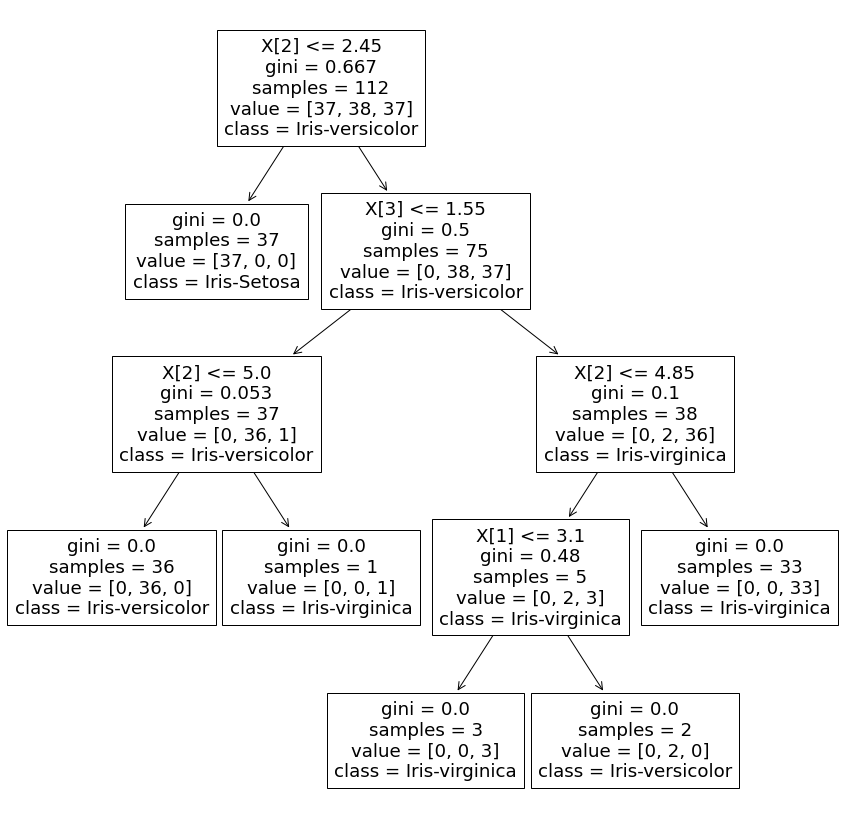

In [0]:
plt.figure(figsize=(15,15))
plot_tree(dt_fit, class_names=['Iris-Setosa', 'Iris-versicolor', 'Iris-virginica'])